# Python Programming Practice Exam

```
Scoring:
============
 0-11: fail (1),
12-14: pass (2),
15-17: satisfactory (3),
18-20: good (4),
21-24: excellent (5).
```

## Problem 1
<p style="text-align: right">(4 points)</p>

The `code` list contains positive integers and strings in an alternating fashion. Write a program that prepares a string from the list so that it
- repeats each string $n$ times where $n$ is the number before the string,
- then concatenates the repeated strings after each other.

Example: `[3, 'va', 2, 'bob'] => 'vavavabobbob'`.
The program should not only work for the given `code` list but also for arbitrary input of the same format. You can assume that the input contains an even number of elements and it is syntactically correct.

In [1]:
code = [2, 'ki', 4, 'abb', 3, 'xor', 1, 'qwer']

In [7]:
# solution 1
result = ''
for i in range(0, len(code), 2):
    result += code[i] * code[i + 1]
print(result)

kikiabbabbabbabbxorxorxorqwer


In [20]:
# solution 1B
''.join(code[i] * code[i + 1] for i in range(0, len(code), 2))

'kikiabbabbabbabbxorxorxorqwer'

In [18]:
# solution 2 (without index based loop)
''.join(n * s for n, s in zip(code[::2], code[1::2]))

'kikiabbabbabbabbxorxorxorqwer'

## Problem 2
<p style="text-align: right">(8 points)</p>

The `letters` object contains a table of lowercase letters. Each row is represented as a string, and the table is represented as a list of strings. Write a program that prints the column containing the most vowels! The program should not only work for the given `letters` object but also for arbitrary input of the same format.

In [1]:
letters = [
    'onceuponamidnig',
    'htdrearywhileip',
    'onderedweakandw',
    'earyovermanyaqu',
    'aintandcuriousv',
    'olumeofforgotte',
    'nlorewhileinodd',
    'ednearlynapping',
    'suddenlythereca',
    'meatappingasofs',
    'omeonegentlyrap',
    'pingrappingatmy',
    'chamberdoortiss',
    'omevisitorimutt',
    'eredtappingatmy'
]

In [34]:
# solution 1

# count vowels for each column
ncols = len(letters[0])
vowels = {'a', 'e', 'i', 'o', 'u'}
counters = [0] * ncols
for row in letters: # iterate over rows
    for j in range(ncols): # iterate over columns (index based)
        ch = row[j]
        if ch in vowels:
            counters[j] += 1

# find column with the most vowels
maxvowels = -1
for j in range(ncols):
    if counters[j] > maxvowels:
        maxvowels = counters[j]
        maxcol = j
maxcol, maxvowels

(4, 10)

In [38]:
# solution 1B

# count vowels for each column
ncols = len(letters[0])
vowels = {'a', 'e', 'i', 'o', 'u'}
counters = [0] * ncols
for row in letters: # iterate over rows
    for j in range(ncols): # iterate over columns (index based)
        ch = row[j]
        if ch in vowels:
            counters[j] += 1

# find column with the most vowels
max(enumerate(counters), key=lambda x: x[1])

(4, 10)

In [2]:
# solution 2 (based on numpy)
import numpy as np

A = np.array([list(row) for row in letters])
vowels = {'a', 'e', 'i', 'o', 'u'}
counters = []
for j in range(A.shape[1]):
    count = sum(ch in vowels for ch in A[:, j])
    counters.append(count)

max(enumerate(counters), key=lambda x: x[1])

(4, 10)

In [3]:
# solution 2B
A = np.array([list(row) for row in letters])
vowels = {'a', 'e', 'i', 'o', 'u'}
counters = [sum(ch in vowels for ch in A[:, j]) for j in range(A.shape[1])]
max(enumerate(counters), key=lambda x: x[1])

(4, 10)

## Problem 3
<p style="text-align: right">(12 points)</p>

The text file [singapore.txt](singapore.txt) contains data about the population of Singapore, split by year, sex, ethnicity and age group. Write a program that reads the data, and then:

**(a)** Plots the total population of Singapore per year.<br>
**(b)** Prints the percentage of different ethnicities in 1957.<br>
**(c)** Prints the male/female ratio in 2019, among the citizens at least 65 years old.

In [18]:
# read data to pandas DataFrame
import pandas as pd
names = ['year', 'sex', 'ethnicity', 'age_group', 'population']
df = pd.read_csv('singapore.txt', sep=';', comment='#', names=names, na_values='na')
df

,year,sex,ethnicity,age_group,population
0,1957,Male,Malays,0 - 4 Years,21743.0
1,1957,Male,Malays,5 - 9 Years,14451.0
2,1957,Male,Malays,10 - 14 Years,8393.0
3,1957,Male,Malays,15 - 19 Years,8528.0
4,1957,Male,Malays,20 - 24 Years,10556.0
...,...,...,...,...,...
9571,2019,Female,Other,70 - 74 Years,849.0
9572,2019,Female,Other,75 - 79 Years,490.0
9573,2019,Female,Other,80 - 84 Years,404.0
9574,2019,Female,Other,85 - 89 Years,264.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        9576 non-null   int64  
 1   sex         9576 non-null   object 
 2   ethnicity   9576 non-null   object 
 3   age_group   9576 non-null   object 
 4   population  8232 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 374.2+ KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,9576.0,1988.000000,18.185192,1957.0,1972.0,1988.0,2004.0,2019.0
population,8232.0,20931.844266,31111.785520,20.0,1900.0,7517.5,21433.5,124778.0


<AxesSubplot: xlabel='year'>

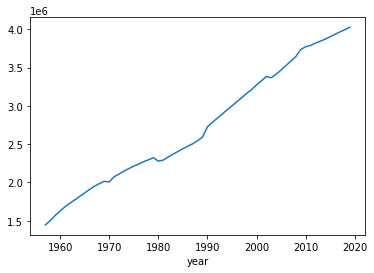

In [27]:
# (a) Plots the total population of Singapore per year.
df.groupby('year')['population'].sum().plot()

In [42]:
# (b) Prints the percentage of different ethnicities in 1957.
se = df[df['year'] == 1957].groupby('ethnicity')['population'].sum()
se / se.sum() * 100

ethnicity
Chinese    75.432856
Indians     8.584120
Malays     13.619579
Other       2.363444
Name: population, dtype: float64

<AxesSubplot: ylabel='population'>

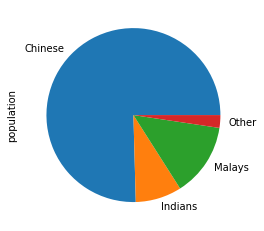

In [44]:
se.plot(kind='pie')

In [56]:
# Prints the male/female ratio in 2019, among the citizens at least 65 years old
age_groups = {'65 - 69 Years', '70 - 74 Years', '75 - 79 Years', '80 - 84 Years', '85 - 89 Years', '90 Years & Over'}
cond = (df['year'] == 2019) & (df['age_group'].isin(age_groups))
se = df[cond].groupby('sex')['population'].sum()
se['Male'] / se['Female']

0.8453495085878165

In [59]:
df['age_group'].unique()

array(['0  -  4 Years', '5  -  9 Years', '10 - 14 Years', '15 - 19 Years',
       '20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years',
       '40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years',
       '60 - 64 Years', '65 - 69 Years', '70 - 74 Years', '75 - 79 Years',
       '80 - 84 Years', '85 - 89 Years', '90 Years & Over'], dtype=object)

In [58]:
cond = (df['year'] == 2019) & (df['age_group'] >= '65') # <= the age group condition can be simplified
se = df[cond].groupby('sex')['population'].sum()
se['Male'] / se['Female']

0.8453495085878165